#### Term Project: Milestone 5, Merging the Data and Storing in a Database/Visualizing Data
##### Name: Prashant Raghuwanshi
##### Date: 11/18/2021
##### Course: DSC540-T301 Data Preparation (2221-1)

In [1]:
# Import common Data preparation libraries:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Insert data from each data source to a SQL Lite database – create a table with the following data
# import sqllite library
import sqlite3 as sql
conn = sql.connect('crypto.sqlite')

#### API Data Source: 

In [3]:
# import libraries for Api Data Source
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

###### Fetching all crypto currency latest price data from coinmarket api

In [4]:
# Calling api request and storing the responce in dict
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'100',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c6d563eb-5020-4805-822e-422c3a9b018c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
# storing jason to Dict
  data = json.loads(response.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

##### Parsing  nested Api Json data into  Dataframe

In [5]:
# crearted the list -step 1
cryptodata = data['data']
# display the first element, with all columns in dataset
cryptodata[0]

{'id': 1,
 'name': 'Bitcoin',
 'symbol': 'BTC',
 'slug': 'bitcoin',
 'num_market_pairs': 8316,
 'date_added': '2013-04-28T00:00:00.000Z',
 'tags': ['mineable',
  'pow',
  'sha-256',
  'store-of-value',
  'state-channel',
  'coinbase-ventures-portfolio',
  'three-arrows-capital-portfolio',
  'polychain-capital-portfolio',
  'binance-labs-portfolio',
  'blockchain-capital-portfolio',
  'boostvc-portfolio',
  'cms-holdings-portfolio',
  'dcg-portfolio',
  'dragonfly-capital-portfolio',
  'electric-capital-portfolio',
  'fabric-ventures-portfolio',
  'framework-ventures-portfolio',
  'galaxy-digital-portfolio',
  'huobi-capital-portfolio',
  'alameda-research-portfolio',
  'a16z-portfolio',
  '1confirmation-portfolio',
  'winklevoss-capital-portfolio',
  'usv-portfolio',
  'placeholder-ventures-portfolio',
  'pantera-capital-portfolio',
  'multicoin-capital-portfolio',
  'paradigm-portfolio'],
 'max_supply': 21000000,
 'circulating_supply': 18878637,
 'total_supply': 18878637,
 'platform':

In [6]:
# Format data into a more readable format-- parsing the api data and writting it to list
# parsing the nested Jason data present in quote collumns and creating datafrane for data preparation requirment
rows=[]
for currency in cryptodata:
    currency_id = currency['id']
    slug = currency['slug']
    cmc_rank = currency['cmc_rank']
    total_supply = currency['total_supply']
    currency_name = currency['name']
    currency_symbol = currency['symbol']
    currenct_price = currency['quote']['USD']['price']
    last_updated = currency['quote']['USD']['last_updated']
    rows.append([currency_id, slug, currency_name , currency_symbol, cmc_rank, currenct_price, total_supply,last_updated])

In [7]:
# Created new Dataframe which contains required price quote columns
# Replace Headers
df_parse_nested_json = pd.DataFrame(rows, columns=["currency_id", "slug", "currency_name", "currency_symbol", "cmc_rank", "currency_price", "total_supply", "last_updated"])

In [8]:
# Display the new df data, use full for creating the lookup file..which contains the currency name and its corresponding short name
df_parse_nested_lookup = pd.DataFrame(df_parse_nested_json, columns = ['slug', 'currency_symbol'])
# writting the df to csv file for archiving the fetch data for future refrences
df_parse_nested_lookup.to_csv(r'coin_lookup.csv')

In [9]:
# display parsed and reshaped dataframe
df_parse_nested_lookup. head()

,slug,currency_symbol
0,bitcoin,BTC
1,ethereum,ETH
2,binance-coin,BNB
3,tether,USDT
4,solana,SOL


In [10]:
#Fix Header casing, updating columns name in uppercase
df_crypto_price = df_parse_nested_json.rename(columns=str.upper)
df_crypto_price.head()

,CURRENCY_ID,SLUG,CURRENCY_NAME,CURRENCY_SYMBOL,CMC_RANK,CURRENCY_PRICE,TOTAL_SUPPLY,LAST_UPDATED
0,1,bitcoin,Bitcoin,BTC,1,57795.820848,1.887864e+07,2021-11-20T17:20:02.000Z
1,1027,ethereum,Ethereum,ETH,2,4245.260330,1.184195e+08,2021-11-20T17:20:02.000Z
2,1839,binance-coin,Binance Coin,BNB,3,580.665077,1.668011e+08,2021-11-20T17:19:09.000Z
3,825,tether,Tether,USDT,4,1.000777,7.635705e+10,2021-11-20T17:19:10.000Z
4,5426,solana,Solana,SOL,5,209.144407,5.093972e+08,2021-11-20T17:20:05.000Z


In [11]:
# transforming total supply value in millions
# create function, convert counts in million
def convert_to_million(total):
    total1 = total/1000000
    return total1

In [12]:
# call created function and update the date column value by using lambda function
df_crypto_price['TOTAL_SUPPLY'] = df_crypto_price['TOTAL_SUPPLY'].apply(lambda x: convert_to_million(x))

In [13]:
df_crypto_price.head()

,CURRENCY_ID,SLUG,CURRENCY_NAME,CURRENCY_SYMBOL,CMC_RANK,CURRENCY_PRICE,TOTAL_SUPPLY,LAST_UPDATED
0,1,bitcoin,Bitcoin,BTC,1,57795.820848,18.878637,2021-11-20T17:20:02.000Z
1,1027,ethereum,Ethereum,ETH,2,4245.260330,118.419508,2021-11-20T17:20:02.000Z
2,1839,binance-coin,Binance Coin,BNB,3,580.665077,166.801148,2021-11-20T17:19:09.000Z
3,825,tether,Tether,USDT,4,1.000777,76357.051672,2021-11-20T17:19:10.000Z
4,5426,solana,Solana,SOL,5,209.144407,509.397234,2021-11-20T17:20:05.000Z


In [14]:
# drop dublicate currency price entries from dataframe
df_crypto_price_drop_dup = df_crypto_price.drop_duplicates(subset=['CURRENCY_ID', 'CURRENCY_SYMBOL'], keep='first')

In [15]:
df_crypto_price_drop_dup.shape

(100, 8)

In [16]:
#created function to convert timestame to date
def tstodate(ts):
    a2 = pd.to_datetime(ts)
    a3 = a2.strftime('%Y%m%d')
    return a3

In [17]:
# call created function and update the date column value by using lambda function
df_crypto_price_drop_dup['LAST_UPDATED'] = df_crypto_price_drop_dup['LAST_UPDATED'].apply(lambda x: tstodate(x))

In [18]:
realtime_cripto_rate = df_crypto_price_drop_dup

In [19]:
#Doping EMPLOYEE table if already exists
cursor0 = conn.cursor()
cursor0.execute("DROP TABLE realtime_cripto_rate")
# loading data to sqllite DB
realtime_cripto_rate.to_sql('realtime_cripto_rate', conn)
#Commit the transaction
conn.commit()

In [20]:
 # pull out records from table
cursor = conn.execute('select CURRENCY_ID, CURRENCY_SYMBOL, CURRENCY_PRICE from realtime_cripto_rate limit 10')
#fetch all rows by using cursor
rows = cursor.fetchall()
# display the fetched data
rows

[(1, 'BTC', 57795.820848495045),
 (1027, 'ETH', 4245.260330101385),
 (1839, 'BNB', 580.6650774716106),
 (825, 'USDT', 1.0007766027504192),
 (5426, 'SOL', 209.14440715164895),
 (2010, 'ADA', 1.87988973875135),
 (52, 'XRP', 1.072959974658014),
 (6636, 'DOT', 40.32423075776385),
 (3408, 'USDC', 1.000115219713096),
 (74, 'DOGE', 0.22699429017168016)]

#### Web Data Source

###### Import libraries for Web Scraping

In [21]:
# import library to open urls and download htmls
# print out python data structures
from pprint import pprint
# for parsing all the tables present
# on the website
import urllib.request
from html_table_parser.parser import HTMLTableParser
# for converting the parsed data to pandas dataframe
from bs4 import BeautifulSoup

In [22]:
# define function to pull the website html file
def url_load_html(url):
    # request to the website
    req = urllib.request.Request(url=url)
    f = urllib.request.urlopen(req)
    # reading contents of the website
    return f.read()

In [23]:
# define the html contents of a URL.
xhtml = url_load_html('https://www.moneycontrol.com/stocks/marketstats/fii_dii_activity/index.php').decode('utf-8')
# Defining the HTMLTableParser object
par = HTMLTableParser()
# feeding the html contents in the
# HTMLTableParser object
par.feed(xhtml)

In [24]:
# Format data into a more readable format

#This step pulls the required table data from html file
#pprint(par.tables[4])
# converting the parsed web table data to dataframe
df_html_data = pd.DataFrame(par.tables[4])
# display the fetch table data in dataframe
df_html_data.head()

,0,1,2,3,4,5,6
0,,FII Rs Crores,DII Rs Crores,None,None,None,None
1,Date,Gross Purchase,Gross Sales,Net Purchase / Sales,Gross Purchase,Gross Sales,Net Purchase / Sales
2,October 2021 October 2021,"185,566.83","211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,September 2021 September 2021,"217,636.41","216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,August 2021 August 2021,"175,168.36","177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"


In [25]:
# setting second row as header
# step-1 extracting the header information
new_header = df_html_data.iloc[1] #grab the first row for the header

In [26]:
new_header[1] = 'Tot_Gross_Purchase'
new_header[2] = 'Gross_Sales'
new_header[3] = 'net_purchase'
new_header

0                    Date
1      Tot_Gross_Purchase
2             Gross_Sales
3            net_purchase
4          Gross Purchase
5             Gross Sales
6    Net Purchase / Sales
Name: 1, dtype: object

In [27]:
df_html_data1 = df_html_data[2:] #take out the data less the header row

In [28]:
df_html_data1.head()

,0,1,2,3,4,5,6
2,October 2021 October 2021,"185,566.83","211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,September 2021 September 2021,"217,636.41","216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,August 2021 August 2021,"175,168.36","177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,July 2021 July 2021,"125,896.68","149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,June 2021 June 2021,"170,188.95","170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


In [29]:
df_html_data1.columns = new_header #set the header row as the df header
df_html_data1.head()

1,Date,Tot_Gross_Purchase,Gross_Sales,net_purchase,Gross Purchase,Gross Sales,Net Purchase / Sales
2,October 2021 October 2021,"185,566.83","211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,September 2021 September 2021,"217,636.41","216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,August 2021 August 2021,"175,168.36","177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,July 2021 July 2021,"125,896.68","149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,June 2021 June 2021,"170,188.95","170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


In [30]:
# renaming the columns names
df_html_data2 = df_html_data1.rename(columns={"Gross Purchase":"Int_Gross_Purchase", "Gross Sales":"Int_Gross_Sales", "Net Purchase / Sales":"int_Net_Purchase"})
df_html_data2.head()

1,Date,Tot_Gross_Purchase,Gross_Sales,net_purchase,Int_Gross_Purchase,Int_Gross_Sales,int_Net_Purchase
2,October 2021 October 2021,"185,566.83","211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,September 2021 September 2021,"217,636.41","216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,August 2021 August 2021,"175,168.36","177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,July 2021 July 2021,"125,896.68","149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,June 2021 June 2021,"170,188.95","170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


In [31]:
#Fix Header casing
# updating columns name in uppercase
df_html_data3 = df_html_data2.rename(columns=str.upper)
df_html_data3.head()

1,DATE,TOT_GROSS_PURCHASE,GROSS_SALES,NET_PURCHASE,INT_GROSS_PURCHASE,INT_GROSS_SALES,INT_NET_PURCHASE
2,October 2021 October 2021,"185,566.83","211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,September 2021 September 2021,"217,636.41","216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,August 2021 August 2021,"175,168.36","177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,July 2021 July 2021,"125,896.68","149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,June 2021 June 2021,"170,188.95","170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


In [32]:
# create lambda function to fix the date inconsistent values
# input -- September 2021 September 2021 --> out put : 2021-09-01
import re
def remove_dup_date(row):
        k = re.split("   ", row)
        k1 = re.split(" ", k[1])
        a = pd.to_datetime(k1[1] + k1[0], format='%Y%B')
        #print(a)
        return a

In [33]:
# fixing inconsistent values for date columns -- date values are populting twice 
# step 1 create function and update the date column value by using lambda function
df_html_data3['DATE'] = df_html_data3['DATE'].apply(lambda x: remove_dup_date(x))

In [34]:
# create lambda function to fix the amount inconsistent values
# input -- '175,168.36' --> out put : 175168.36
import re
def fix_amount_value(row):
        b = row.replace(',', '')
        b2 = float(b)
        #print(b2)
        return b

In [35]:
# displaying df after fixing date value
df_html_data3.head()

1,DATE,TOT_GROSS_PURCHASE,GROSS_SALES,NET_PURCHASE,INT_GROSS_PURCHASE,INT_GROSS_SALES,INT_NET_PURCHASE
2,2021-10-01,"185,566.83","211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,2021-09-01,"217,636.41","216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,2021-08-01,"175,168.36","177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,2021-07-01,"125,896.68","149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,2021-06-01,"170,188.95","170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


In [36]:
df_html_data3['TOT_GROSS_PURCHASE'] = df_html_data3['TOT_GROSS_PURCHASE'].apply(lambda x: fix_amount_value(x))

In [37]:
# Remove duplicates based on second and third columns value
df_html_data3_rm_dup = df_html_data3.drop_duplicates(['TOT_GROSS_PURCHASE', 'GROSS_SALES'], keep='last')
df_html_data3_rm_dup.head()

1,DATE,TOT_GROSS_PURCHASE,GROSS_SALES,NET_PURCHASE,INT_GROSS_PURCHASE,INT_GROSS_SALES,INT_NET_PURCHASE
2,2021-10-01,185566.83,"211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,2021-09-01,217636.41,"216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,2021-08-01,175168.36,"177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,2021-07-01,125896.68,"149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,2021-06-01,170188.95,"170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


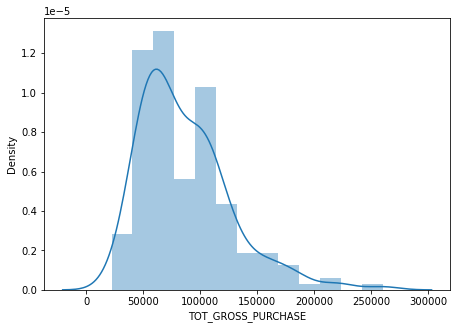

In [38]:
#Identify outliers and bad data
#plot boxplot to find outliers data
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df_html_data3_rm_dup['TOT_GROSS_PURCHASE'])
plt.show()

In [39]:
#  Finding the Outliers
df_html_data3_rm_dup[(df_html_data3_rm_dup['TOT_GROSS_PURCHASE'] > '250000') | (df_html_data3_rm_dup['TOT_GROSS_PURCHASE'] < '25000')].head(5)

1,DATE,TOT_GROSS_PURCHASE,GROSS_SALES,NET_PURCHASE,INT_GROSS_PURCHASE,INT_GROSS_SALES,INT_NET_PURCHASE
2,2021-10-01,185566.83,"211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,2021-09-01,217636.41,"216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,2021-08-01,175168.36,"177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,2021-07-01,125896.68,"149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,2021-06-01,170188.95,"170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


In [40]:
#Trimming of Outliers
df_html_data_trim_out = df_html_data3_rm_dup[(df_html_data3_rm_dup['TOT_GROSS_PURCHASE'] < '250000') | (df_html_data3_rm_dup['TOT_GROSS_PURCHASE'] > '25000')]
df_html_data_trim_out.head()

1,DATE,TOT_GROSS_PURCHASE,GROSS_SALES,NET_PURCHASE,INT_GROSS_PURCHASE,INT_GROSS_SALES,INT_NET_PURCHASE
2,2021-10-01,185566.83,"211,139.02","-25,572.19","151,607.74","147,136.75","4,470.99"
3,2021-09-01,217636.41,"216,722.64",913.77,"144,147.33","138,198.48","5,948.85"
4,2021-08-01,175168.36,"177,736.88","-2,568.52","131,185.18","124,290.49","6,894.69"
5,2021-07-01,125896.68,"149,090.07","-23,193.39","117,910.10","99,516.18","18,393.92"
6,2021-06-01,170188.95,"170,214.84",-25.89,"114,289.67","107,246.16","7,043.51"


In [41]:
monthly_cripto_transaction = df_html_data_trim_out

In [42]:
cursor0 = conn.cursor()
cursor0.execute("DROP TABLE monthly_cripto_transaction")
monthly_cripto_transaction.to_sql('monthly_cripto_transaction', conn)
#Commit the transaction
conn.commit()

In [43]:
 # pull out records from table
cursor1 = conn.execute('select DATE,TOT_GROSS_PURCHASE,GROSS_SALES,NET_PURCHASE from monthly_cripto_transaction limit 10')
#fetch all rows by using cursor
rows1 = cursor1.fetchall()
# display the fetched data
rows1

[('2021-10-01 00:00:00', '185566.83', '211,139.02', '-25,572.19'),
 ('2021-09-01 00:00:00', '217636.41', '216,722.64', '913.77'),
 ('2021-08-01 00:00:00', '175168.36', '177,736.88', '-2,568.52'),
 ('2021-07-01 00:00:00', '125896.68', '149,090.07', '-23,193.39'),
 ('2021-06-01 00:00:00', '170188.95', '170,214.84', '-25.89'),
 ('2021-05-01 00:00:00', '166976.74', '172,992.08', '-6,015.34'),
 ('2021-04-01 00:00:00', '133795.77', '145,835.20', '-12,039.43'),
 ('2021-03-01 00:00:00', '190759.51', '189,514.29', '1,245.22'),
 ('2021-02-01 00:00:00', '223030.67', '180,986.21', '42,044.46'),
 ('2021-01-01 00:00:00', '168241.42', '159,260.61', '8,980.81')]

##### Flat File Source Data:

###### Data Source : https://www.kaggle.com/danielbethell/adult-incomes-in-the-united-states
###### crypto_income for adult, updated the dataset by adding additional columns crypto_slang & crypto symbol

##### Data Set Details: 
Dataset columns details:
age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
crypto_slang: 20 crypto currencires name like bitcoins
crypto_symbol:

In [44]:
# read source file into dataframe
crypto_income_df = pd.read_csv(r"crypto_income_data.txt", sep="|")
# display firt 5 records
crypto_income_df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,total-income,crypto_slang,crypto_symbol
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,Male,2174,0,40,United-States,<=50K,bitcoin,BTC
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,Male,0,0,13,United-States,<=50K,ethereum,ETH
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,Male,0,0,40,United-States,<=50K,cardano,ADA
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,Male,0,0,40,United-States,<=50K,binance-coin,BNB
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Female,0,0,40,Cuba,<=50K,tether,USDT


In [45]:
# Headers, updating columns name in uppercase
crypto_income_df = crypto_income_df.rename(columns=str.upper)
crypto_income_df.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION-NUM,MARITAL-STATUS,RELATIONSHIP,SEX,CAPITAL-GAIN,CAPITAL-LOSS,HOURS-PER-WEEK,NATIVE-COUNTRY,TOTAL-INCOME,CRYPTO_SLANG,CRYPTO_SYMBOL
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,Male,2174,0,40,United-States,<=50K,bitcoin,BTC
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,Male,0,0,13,United-States,<=50K,ethereum,ETH
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,Male,0,0,40,United-States,<=50K,cardano,ADA
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,Male,0,0,40,United-States,<=50K,binance-coin,BNB
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Female,0,0,40,Cuba,<=50K,tether,USDT


##### Performing the transformation operation on File data source:

In [46]:
# renaming the columns names
crypto_income_df2 = crypto_income_df.rename(columns={"EDUCATION-NUM":"EDUCATION_NUM", "CAPITAL-GAIN":"CAPITAL_GAIN", "HOURS-PER-WEEK":"HOURS_PER_WEEK", "NATIVE-COUNTRY":"NATIVE_COUNTRY", "TOTAL-INCOME":"TOTAL_INCOME"})

In [47]:
crypto_income_df2.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARITAL-STATUS,RELATIONSHIP,SEX,CAPITAL_GAIN,CAPITAL-LOSS,HOURS_PER_WEEK,NATIVE_COUNTRY,TOTAL_INCOME,CRYPTO_SLANG,CRYPTO_SYMBOL
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,Male,2174,0,40,United-States,<=50K,bitcoin,BTC
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Husband,Male,0,0,13,United-States,<=50K,ethereum,ETH
2,38,Private,215646,HS-grad,9,Divorced,Not-in-family,Male,0,0,40,United-States,<=50K,cardano,ADA
3,53,Private,234721,11th,7,Married-civ-spouse,Husband,Male,0,0,40,United-States,<=50K,binance-coin,BNB
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Wife,Female,0,0,40,Cuba,<=50K,tether,USDT


In [48]:
#5. Look at summary information about your data (total, mean, min, max,␣
#freq, unique, etc.) Does this present any more questions for you? Does it␣
#lead you to a conclusion yet?
print("\nDescribe Data\n")
print(crypto_income_df.describe())
print("\nSummarized Data\n")
print(crypto_income_df.describe(include=['O']))


Describe Data

                AGE        FNLWGT  EDUCATION-NUM  CAPITAL-GAIN  CAPITAL-LOSS  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       HOURS-PER-WEEK  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

Summarized Data

       WORKCLASS EDUCATION   

In [49]:
# find out the null present in required columns
print(f"is null is present in AGE -- {crypto_income_df.AGE.isnull().values.any()}")
print(f"is null is present in CRYPTO_SYMBOL -- {crypto_income_df.CRYPTO_SYMBOL.isnull().values.any()}")
print(f"is null is present in CRYPTO_SLANG -- {crypto_income_df.CRYPTO_SLANG.isnull().values.any()}")
print(f"is null is present in CAPITAL_GAIN -- {crypto_income_df2.CAPITAL_GAIN.isnull().values.any()}")

is null is present in AGE -- False
is null is present in CRYPTO_SYMBOL -- False
is null is present in CRYPTO_SLANG -- False
is null is present in CAPITAL_GAIN -- False


In [50]:
#from fuzzywuzzy import fuzz
#from fuzzywuzzy import process
#df_crypto_price['name_from_df2'] = df_crypto_price['CURRENCY_NAME'].apply(lambda x: process.extractOne(x, crypto_income_df2['CRYPTO_SLANG'].to_list(),score_cutoff=80))
#name_from_df2_list = df_crypto_price['name_from_df2'].to_list()
#name_from_df2_list = [_[0] if _ != None else None for _ in name_from_df2_list]
#df_crypto_price['name_from_df2'] = name_from_df2_list

#df_crypto_price = df_crypto_price.merge(crypto_income_df2, left_on = 'name_from_df2', right_on = 'CRYPTO_SLANG', suffixes=('','_2'))
#df_crypto_price.drop(['CURRENCY_NAME','name_from_df2'],axis=1, inplace=True)

In [51]:
# identifying outliers
# load libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

{'whiskers': [<matplotlib.lines.Line2D at 0x1814cfff730>,
 'caps': [<matplotlib.lines.Line2D at 0x1814cfffdf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1814cfff3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1814d3da4f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1814d3da850>],
 'means': []}

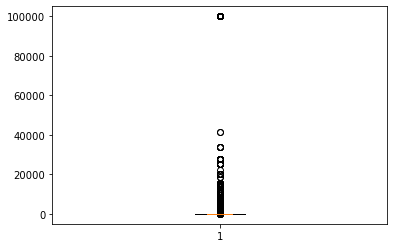

In [52]:
#plot boxplot to find outliers data
plt.boxplot(crypto_income_df2.CAPITAL_GAIN, notch=True)

In [53]:
# fixing outliers 
crypto_income_df2_fix = crypto_income_df2[(crypto_income_df2['CAPITAL_GAIN'] <= 60000) & (crypto_income_df2['CAPITAL_GAIN'] >= 1)]

In [54]:
# new shape of dh after fixing outliers
crypto_income_df2_fix.shape

(2553, 15)

{'whiskers': [<matplotlib.lines.Line2D at 0x1814d43aa00>,
 'caps': [<matplotlib.lines.Line2D at 0x1814d448100>,
 'boxes': [<matplotlib.lines.Line2D at 0x1814d43a6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1814d4487c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1814d448b20>],
 'means': []}

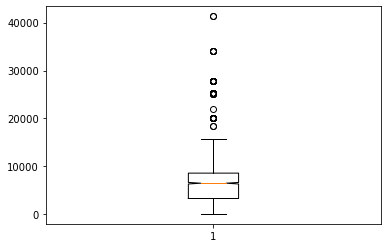

In [55]:
# plot after fixing outliers
#plot boxplot to after fixing outliers data
plt.boxplot(crypto_income_df2_fix.CAPITAL_GAIN, notch=True)

In [56]:
crypto_income_df2_fix.head()

,AGE,WORKCLASS,FNLWGT,EDUCATION,EDUCATION_NUM,MARITAL-STATUS,RELATIONSHIP,SEX,CAPITAL_GAIN,CAPITAL-LOSS,HOURS_PER_WEEK,NATIVE_COUNTRY,TOTAL_INCOME,CRYPTO_SLANG,CRYPTO_SYMBOL
0,39,State-gov,77516,Bachelors,13,Never-married,Not-in-family,Male,2174,0,40,United-States,<=50K,bitcoin,BTC
8,31,Private,45781,Masters,14,Never-married,Not-in-family,Female,14084,0,50,United-States,>50K,usd-coin,USDC
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Husband,Male,5178,0,40,United-States,>50K,dogecoin,DOGE
59,30,Private,188146,HS-grad,9,Married-civ-spouse,Husband,Male,5013,0,40,United-States,<=50K,usd-coin,USDC
60,30,Private,59496,Bachelors,13,Married-civ-spouse,Husband,Male,2407,0,40,United-States,<=50K,dogecoin,DOGE


In [57]:
crypto_adult_income = crypto_income_df2_fix

In [58]:
cursor0.execute("DROP TABLE crypto_adult_income")
# loading data to sqllite DB
crypto_adult_income.to_sql('crypto_adult_income', conn)
#Commit the transaction
conn.commit()

In [59]:
 # pull out records from table
cursor3 = conn.execute('select AGE,WORKCLASS,EDUCATION,EDUCATION_NUM ,RELATIONSHIP,SEX,CAPITAL_GAIN, CRYPTO_SYMBOL from crypto_adult_income limit 10')
#fetch all rows by using cursor
rows3 = cursor3.fetchall()
# dsiplay query records
rows3

[(39, 'State-gov', 'Bachelors', 13, 'Not-in-family', 'Male', 2174, 'BTC'),
 (31, 'Private', 'Masters', 14, 'Not-in-family', 'Female', 14084, 'USDC'),
 (42, 'Private', 'Bachelors', 13, 'Husband', 'Male', 5178, 'DOGE'),
 (30, 'Private', 'HS-grad', 9, 'Husband', 'Male', 5013, 'USDC'),
 (30, 'Private', 'Bachelors', 13, 'Husband', 'Male', 2407, 'DOGE'),
 (44, 'Private', 'HS-grad', 9, 'Not-in-family', 'Female', 14344, 'BNB'),
 (44, 'Private', 'Bachelors', 13, 'Husband', 'Male', 15024, 'ADA'),
 (32, 'Self-emp-inc', 'HS-grad', 9, 'Husband', 'Male', 7688, 'BTC'),
 (17, '?', '10th', 6, 'Own-child', 'Female', 34095, 'ETH'),
 (28, 'Private', 'Some-college', 10, 'Wife', 'Female', 4064, 'ADA')]

In [60]:
## Joining realtime_cripto_rate, crypto_adult_income table to compute the individual capital gain in respective cryto currency

In [61]:
join_adult_income_incrypto = pd.DataFrame()
cursor4 = conn.execute('select AGE,WORKCLASS,EDUCATION,EDUCATION_NUM ,RELATIONSHIP,SEX,CAPITAL_GAIN, CRYPTO_SYMBOL, CURRENCY_ID, CURRENCY_PRICE, CAPITAL_GAIN/CURRENCY_PRICE as GAIN_IN_CRYPTO from crypto_adult_income join realtime_cripto_rate on CRYPTO_SYMBOL = CURRENCY_SYMBOL')
#fetch all rows by using cursor
rows4 = cursor4.fetchall()
join_adult_income_incrypto = join_adult_income_incrypto.append(pd.DataFrame(rows4, columns=['AGE','WORKCLASS','EDUCATION','EDUCATION_NUM','RELATIONSHIP','SEX','CAPITAL_GAIN','CRYPTO_SYMBOL', 'CURRENCY_ID', 'CURRENCY_PRICE', 'GAIN_IN_CRYPTO']),ignore_index=True)
# loading data to sqllite DB
cursor0.execute("DROP TABLE join_adult_income_incrypto")
join_adult_income_incrypto.to_sql('join_adult_income_incrypto', conn)
#Commit the transaction
conn.commit()

In [62]:
join_adult_income_incrypto.head()

,AGE,WORKCLASS,EDUCATION,EDUCATION_NUM,RELATIONSHIP,SEX,CAPITAL_GAIN,CRYPTO_SYMBOL,CURRENCY_ID,CURRENCY_PRICE,GAIN_IN_CRYPTO
0,39,State-gov,Bachelors,13,Not-in-family,Male,2174,BTC,1,57795.820848,0.037615
1,31,Private,Masters,14,Not-in-family,Female,14084,USDC,3408,1.000115,14082.377433
2,42,Private,Bachelors,13,Husband,Male,5178,DOGE,74,0.226994,22811.146466
3,30,Private,HS-grad,9,Husband,Male,5013,USDC,3408,1.000115,5012.422470
4,30,Private,Bachelors,13,Husband,Male,2407,DOGE,74,0.226994,10603.790951


In [63]:
 # pull out records from  join_adult_income_incrypto table
cursor5 = conn.execute('select * from join_adult_income_incrypto limit 1')
#fetch all rows by using cursor
rows5 = cursor5.fetchall()
# dsiplay query records
rows5

[(0,
  39,
  'State-gov',
  'Bachelors',
  13,
  'Not-in-family',
  'Male',
  2174,
  'BTC',
  1,
  57795.820848495045,
  0.0376151764623066)]

In [64]:
## subquery between  realtime_cripto_rate & monthly_cripto_transaction table to compute the monthly transcation in corresponding crypto currency coins
# assuming BTC trade is 30% of daily TOT_GROSS_PURCHASE
# assuming ETH trade is 20% of daily TOT_GROSS_PURCHASE
# assuming BNB trade is 10% of daily TOT_GROSS_PURCHASE
# Deriving new columnss to visualize the corresponding cyrtpo currency monthly purase in terms of corresponding cryto coins
df2_table2 = pd.DataFrame()
cursor5 = conn.execute("select DATE, TOT_GROSS_PURCHASE as GROSS_PURCHASE_IN_DOLLAR , TOT_GROSS_PURCHASE*0.3/CURRENCY_PRICE_BTC as COINS_IN_BTC, TOT_GROSS_PURCHASE*0.2/CURRENCY_PRICE_ETH as COINS_IN_ETH, TOT_GROSS_PURCHASE*0.1/CURRENCY_PRICE_BNB as COINS_IN_BNB  from monthly_cripto_transaction, (select SUM(CURRENCY_PRICE) FILTER (WHERE CURRENCY_SYMBOL = 'BTC') CURRENCY_PRICE_BTC,SUM(CURRENCY_PRICE) FILTER (WHERE CURRENCY_SYMBOL = 'ETH') CURRENCY_PRICE_ETH, SUM(CURRENCY_PRICE) FILTER (WHERE CURRENCY_SYMBOL = 'BNB') CURRENCY_PRICE_BNB from realtime_cripto_rate limit 3)")
rows5 = cursor5.fetchall()
df2_table2 = df2_table2.append(pd.DataFrame(rows5, columns=['DATE','TOT_GROSS_PURCHASE','COINS_IN_BTC','COINS_IN_ETH','COINS_IN_BNB']),ignore_index=True)
# loading data to sqllite DB
cursor0.execute("DROP TABLE subq_monthly_coin_counts")
join_adult_income_incrypto.to_sql('subq_monthly_coin_counts', conn)
#Commit the transaction
conn.commit()

In [65]:
df2_table2.head()

,DATE,TOT_GROSS_PURCHASE,COINS_IN_BTC,COINS_IN_ETH,COINS_IN_BNB
0,2021-10-01 00:00:00,185566.83,0.963219,8.742306,31.957636
1,2021-09-01 00:00:00,217636.41,1.129682,10.253148,37.480541
2,2021-08-01 00:00:00,175168.36,0.909244,8.252420,30.166849
3,2021-07-01 00:00:00,125896.68,0.653490,5.931164,21.681462
4,2021-06-01 00:00:00,170188.95,0.883398,8.017833,29.309314


In [66]:
 # pull out records from  subq_monthly_coin_counts table
cursor6 = conn.execute('select * from subq_monthly_coin_counts limit 1')
#fetch all rows by using cursor
rows6 = cursor6.fetchall()
# dsiplay query records
rows6

[(0,
  39,
  'State-gov',
  'Bachelors',
  13,
  'Not-in-family',
  'Male',
  2174,
  'BTC',
  1,
  57795.820848495045,
  0.0376151764623066)]

##### Visualizing Data

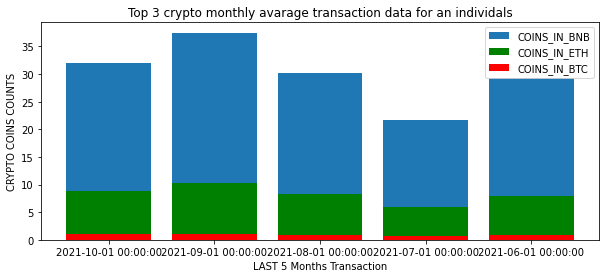

In [67]:
# Bar char visualization - visualizing data by using subq_monthly_coin_counts. (realtime_cripto_rate & monthly_cripto_transaction table)
import matplotlib.pyplot as plt
# selecting the transaction data for last 5 mounths
df3_table2 = df2_table2.head()
plt.rcParams['figure.figsize'] = [10, 4]
plt.bar(df3_table2.DATE,df3_table2.COINS_IN_BNB, label="COINS_IN_BNB")
plt.bar(df3_table2.DATE,df3_table2.COINS_IN_ETH, label="COINS_IN_ETH", color='g')
plt.bar(df3_table2.DATE,df3_table2.COINS_IN_BTC, label="COINS_IN_BTC", color='r')
plt.legend()
plt.xlabel('LAST 5 Months Transaction')
plt.ylabel('CRYPTO COINS COUNTS')
plt.title('Top 3 crypto monthly avarage transaction data for an individals')
plt.show()

In [68]:
# aggregating the data  from join_adult_income_incrypto table to find out if education level is contributting in crypto profitability
education_income_incrypto = pd.DataFrame()
cursor7 = conn.execute('select EDUCATION, count(CAPITAL_GAIN > 0) CAPITAL_GAIN_CNT from join_adult_income_incrypto group by EDUCATION ')
#fetch all rows by using cursor
rows7 = cursor7.fetchall()
education_income_incrypto = education_income_incrypto.append(pd.DataFrame(rows7, columns=['EDUCATION','CAPITAL_GAIN_CNT']),ignore_index=True)

In [69]:
education_income_incrypto.head()

,EDUCATION,CAPITAL_GAIN_CNT
0,10th,38
1,11th,53
2,12th,22
3,1st-4th,5
4,5th-6th,14


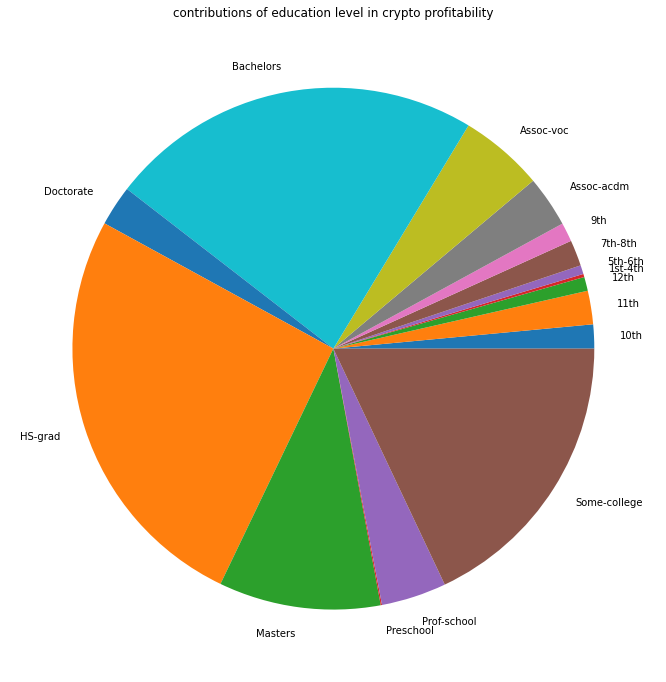

In [70]:
# Pie Char Visualization to show the contributions of education level in crypto profitability
import numpy as np
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 12]
y = np.array(education_income_incrypto.CAPITAL_GAIN_CNT)
mylabels = education_income_incrypto.EDUCATION
plt.pie(y, labels = mylabels)
plt.title('contributions of education level in crypto profitability')
plt.show()

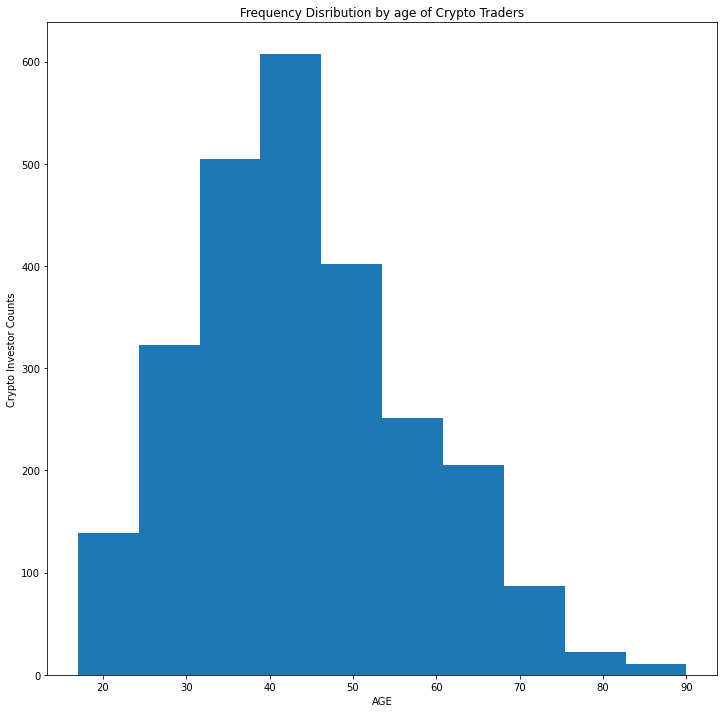

In [71]:
# Histrogram Visualization to show the Frequency Disribution by age of Crypto Traders/investors
x = np.array(join_adult_income_incrypto.AGE)
plt.xlabel('AGE')
plt.ylabel('Crypto Investor Counts')
plt.title('Frequency Disribution by age of Crypto Traders')
plt.hist(x)
plt.show() 

In [72]:
# aggregating the data  from join_adult_income_incrypto table to find out the distribution of different crypto currency amoung Males
sex_incrypto_male = pd.DataFrame()
cursor8 = conn.execute("select CRYPTO_SYMBOL, count(CRYPTO_SYMBOL) CRYPTO_SYMBOL_CNT from join_adult_income_incrypto  where SEX = 'Male' group by CRYPTO_SYMBOL")
#fetch all rows by using cursor
rows8 = cursor8.fetchall()
sex_incrypto_male = sex_incrypto_male.append(pd.DataFrame(rows8, columns=['CRYPTO_SYMBOL','CRYPTO_SYMBOL_CNT']),ignore_index=True)

In [73]:
sex_incrypto_male.head()

,CRYPTO_SYMBOL,CRYPTO_SYMBOL_CNT
0,AAVE,8
1,ADA,44
2,AMP,3
3,AR,8
4,BNB,41


In [74]:
# aggregating the data  from join_adult_income_incrypto table to find out the distribution of different crypto currency amoung females
sex_incrypto_female = pd.DataFrame()
cursor8 = conn.execute("select CRYPTO_SYMBOL, count(CRYPTO_SYMBOL) CRYPTO_SYMBOL_CNT from join_adult_income_incrypto  where SEX = 'Female' group by CRYPTO_SYMBOL")
#fetch all rows by using cursor
rows8 = cursor8.fetchall()
sex_incrypto_female = sex_incrypto_female.append(pd.DataFrame(rows8, columns=['CRYPTO_SYMBOL','CRYPTO_SYMBOL_CNT']),ignore_index=True)

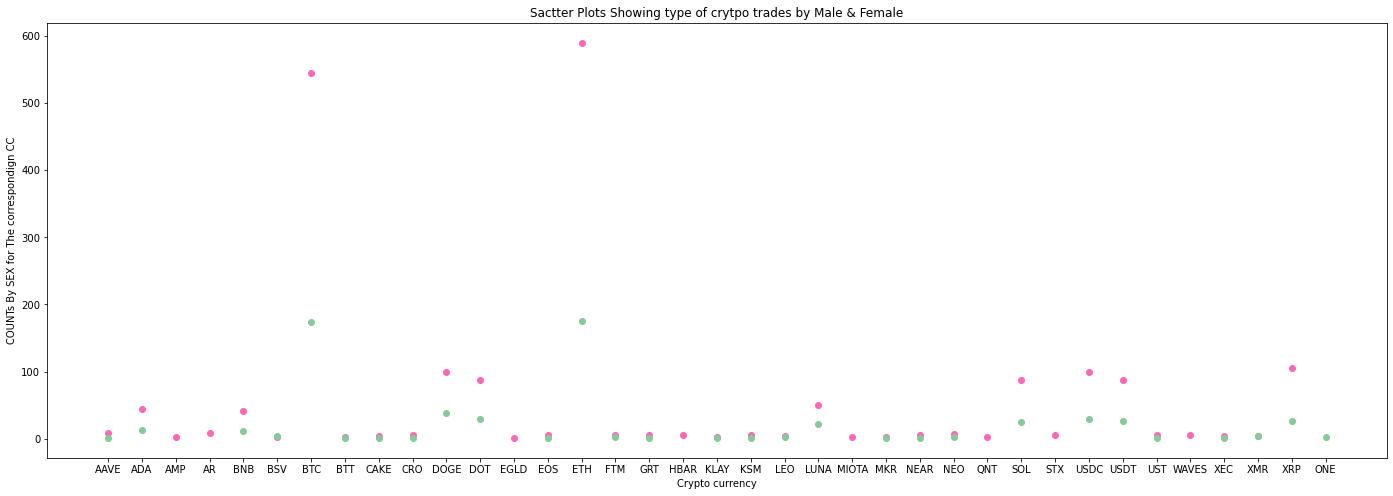

In [75]:
# Sactter Plots Showing type of crytpo trades by Male & Female
plt.rcParams['figure.figsize'] = [24, 8]
x = np.array(sex_incrypto_male.CRYPTO_SYMBOL)
y = np.array(sex_incrypto_male.CRYPTO_SYMBOL_CNT)
plt.scatter(x, y, color = 'hotpink')

x = np.array(sex_incrypto_female.CRYPTO_SYMBOL)
y = np.array(sex_incrypto_female.CRYPTO_SYMBOL_CNT)
plt.scatter(x, y, color = '#88c999')

plt.xlabel('Crypto currency')
plt.ylabel('COUNTs By SEX for The correspondign CC')
plt.title('Sactter Plots Showing type of crytpo trades by Male & Female')

plt.show()

In [76]:
# aggregating the data  from join_adult_income_incrypto table to find out the DOGDE coin holding by age
DOGE_COIN_HOLDER_BY_AGE = pd.DataFrame()
cursor9 = conn.execute("select AGE, SUM(GAIN_IN_CRYPTO) DOGE_COIN_CNT from join_adult_income_incrypto  where CRYPTO_SYMBOL = 'DOGE' group by AGE")
#fetch all rows by using cursor
rows9 = cursor9.fetchall()
DOGE_COIN_HOLDER_BY_AGE = DOGE_COIN_HOLDER_BY_AGE.append(pd.DataFrame(rows9, columns=['AGE','DOGE_COIN_CNT']),ignore_index=True)
DOGE_COIN_HOLDER_BY_AGE.head()

,AGE,DOGE_COIN_CNT
0,19,66186.686849
1,21,29436.863786
2,24,56653.407406
3,26,22286.904204
4,27,88072.699912


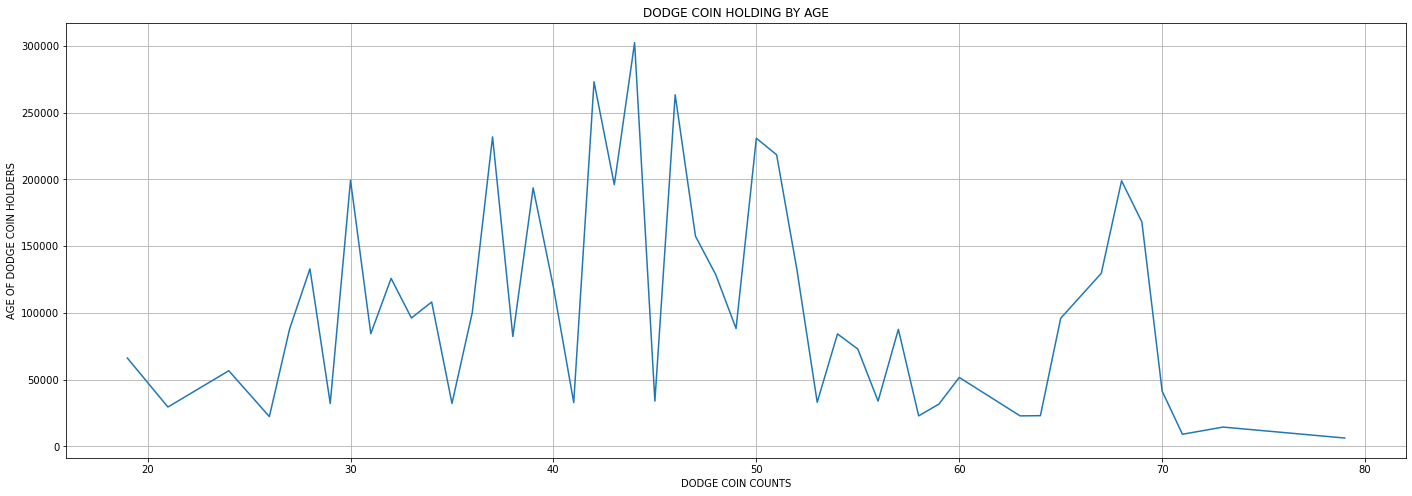

In [77]:
# Grid Lines visualization to show the distribution of DODGE coin by Age
x = np.array(DOGE_COIN_HOLDER_BY_AGE.AGE)
y = np.array(DOGE_COIN_HOLDER_BY_AGE.DOGE_COIN_CNT)
plt.title("DODGE COIN HOLDING BY AGE")
plt.xlabel("DODGE COIN COUNTS")
plt.ylabel("AGE OF DODGE COIN HOLDERS")
plt.plot(x, y)
plt.grid()

plt.show()